In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

2024-06-11 14:33:21.352024: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-11 14:33:21.352166: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-11 14:33:21.514736: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# 1. Preprocess Image and Load

In [3]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [4]:
content_image = load_image("/kaggle/input/lfd-style/cat_n/1.jpg")
style_image = load_image("/kaggle/input/lfd-style/styles/1.jpg")

# 2. Visualize Output

In [5]:
content_image.shape

TensorShape([1, 281, 300, 3])

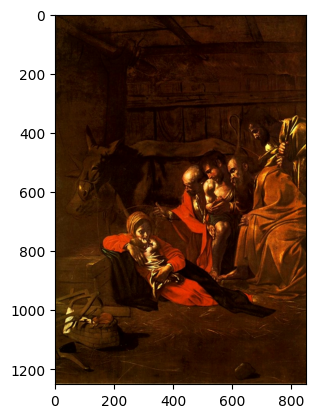

In [6]:
plt.imshow(np.squeeze(style_image))
plt.show()

# 3. Stylize Image

In [7]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

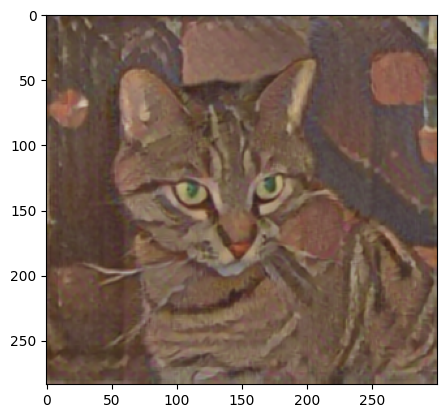

In [8]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [9]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True

# Style transfer for all dataset


In [11]:

def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

def NST(img_path,style_path):
    
   
    
    
    content_image = load_image(f"/kaggle/input/lfd-style/{img_path}.jpg")
    style_image = load_image(f"/kaggle/input/lfd-style/styles/{style_path}.jpg")
    
    if "cat_n" in img_path:
        res_file="cats"
    else:
        res_file="dogs"

    stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]
    
    
    stylized_image_bgr = cv2.cvtColor(np.squeeze(stylized_image) * 255, cv2.COLOR_BGR2RGB)
    
    output_dir = str(style_path)+"/"+str(res_file) +"/"
    
    
    
    cv2.imwrite(os.path.join(output_dir, f'{i}.jpg'), stylized_image_bgr)

for i in range(1,6,1):
    os.makedirs(str(i), exist_ok=True)
    os.makedirs(str(i)+"/cats", exist_ok=True)
    os.makedirs(str(i)+"/dogs", exist_ok=True)
    
    


for j in range(1,6,1):
    
    for i in range(1,101,1):
        var1="dog_n/"+str(i)
        NST(var1, j )
        var2="cat_n/"+str(i)
        NST(var2, j )

        
    

    
    
    

In [12]:
# Step 1: Install necessary libraries
!pip install transformers datasets

# Step 2: Import libraries
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
from PIL import Image
import torch
import os

# Step 3: Load the model and feature extractor
model_name = "tangocrazyguy/resnet-50-finetuned-cats_vs_dogs"

feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name)

# Step 4: Preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return feature_extractor(images=image, return_tensors="pt")



preprocessor_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/749 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/94.4M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [13]:
#Initial image classification for images
#accuracy calculation
from tqdm import tqdm


def classify_100(path,kind):
    res = kind=="dog"
    
    curr=0
    for file in tqdm(os.listdir(path)):
        
        
        # Step 5: Example image path
        image_path = f"{path}/{file}"
        
        
        # Preprocess the image
        inputs = preprocess_image(image_path)

        # Step 6: Inference
        with torch.no_grad():
            outputs = model(**inputs)
        
        logits = outputs.logits
        predicted_class = logits.argmax(-1).item()
        
        if predicted_class == res:
            curr+=1
    print(f"Accuracy is {curr/len(os.listdir(path))} for {kind}")
    
        


In [14]:
#accuracy calculation for inputs
classify_100("/kaggle/input/lfd-style/cat_n" , "cat")
classify_100("/kaggle/input/lfd-style/dog_n" , "dog")


100%|██████████| 100/100 [00:08<00:00, 11.36it/s]


Accuracy is 0.97 for cat


100%|██████████| 100/100 [00:08<00:00, 11.35it/s]

Accuracy is 1.0 for dog


In [20]:
#accuracy calculation for outputs
for i in range(1,6,1):
    path = f"/kaggle/working/{i}/"
    dog_path = f"{path}dogs/"
    cat_path= f"{path}cats/"
    
    print(f"Result accuracy for style {i}")
    classify_100(dog_path, "dog")
    classify_100(cat_path,"cat")
    



Result accuracy for style 1


100%|██████████| 100/100 [00:08<00:00, 11.47it/s]


Accuracy is 0.97 for dog


100%|██████████| 100/100 [00:09<00:00, 10.84it/s]


Accuracy is 0.66 for cat
Result accuracy for style 2


100%|██████████| 100/100 [00:08<00:00, 11.42it/s]


Accuracy is 1.0 for dog


100%|██████████| 100/100 [00:08<00:00, 11.42it/s]


Accuracy is 0.01 for cat
Result accuracy for style 3


100%|██████████| 100/100 [00:09<00:00, 10.98it/s]


Accuracy is 0.91 for dog


100%|██████████| 100/100 [00:08<00:00, 11.19it/s]


Accuracy is 0.83 for cat
Result accuracy for style 4


100%|██████████| 100/100 [00:08<00:00, 11.35it/s]


Accuracy is 0.69 for dog


100%|██████████| 100/100 [00:08<00:00, 11.34it/s]


Accuracy is 0.55 for cat
Result accuracy for style 5


100%|██████████| 100/100 [00:09<00:00, 10.74it/s]


Accuracy is 1.0 for dog


100%|██████████| 100/100 [00:08<00:00, 11.37it/s]

Accuracy is 0.01 for cat
